# Veri setinin yüklenmesi ve incelenmesi 

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
df = pd.read_csv("diabetes.csv")
df = df.copy()
df.dropna(inplace = True)
df.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### bağımlı değişkenimize bakalım 


In [5]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

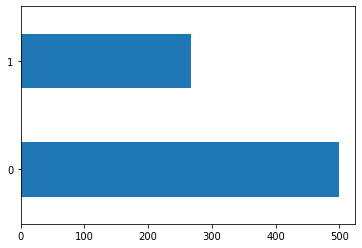

In [6]:
df.Outcome.value_counts().plot.barh();

# Bagımlı ve bağımsız değişken seçimleri 

In [7]:
y = df.Outcome

In [8]:
X = df.drop(["Outcome"] , axis = 1)

# Veri setinin Train - Test Olarak ayrılması 

In [9]:
from sklearn.model_selection import train_test_split , cross_val_score

In [10]:
X_train , X_test ,y_train , y_test = train_test_split(X ,y , test_size = 0.30 ,random_state = 11)

In [11]:
print(X_train.shape)
print(y_train.shape)


(537, 8)
(537,)


# Model Kurma 

In [12]:
from sklearn.svm import SVC

In [18]:
svc = SVC(kernel = "rbf" ,probability = True)
# evet doğrusal regression yapacağız
# probability True yaparsak prob sonuçlarınıda alabilirz 

In [19]:
svc_model = svc.fit(X_train ,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Tahmin 

In [20]:
from sklearn.metrics import accuracy_score 

In [21]:
y_pred = svc_model.predict(X_test)

In [22]:
y_proba = svc_model.predict_proba(X_train)

In [23]:
y_proba

array([[0.9962323 , 0.0037677 ],
       [0.12019041, 0.87980959],
       [0.99622647, 0.00377353],
       ...,
       [0.12003255, 0.87996745],
       [0.11998843, 0.88001157],
       [0.11998844, 0.88001156]])

In [24]:
accuracy_score(y_test , y_pred)

0.645021645021645

# Model Tuning

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [47]:
svc = SVC(kernel = "rbf")
svc_params = {"C" : np.arange(1,7),
              "gamma" : [0.001 ,0.01 , 1 ,5 ,4 ,10 ,100]}

# burda lineardan farklı olarak gama değerleri gireceğiz

In [48]:
svc_cv = GridSearchCV(svc,
                     svc_params,
                     cv =10,
                     n_jobs = -1 ,
                     verbose = 2)
svc_cv.fit(X_train ,y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    1.2s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6]),
                         'gamma': [0.001, 0.01, 1, 5, 4, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [49]:
svc_cv.best_params_

{'C': 2, 'gamma': 0.001}

In [50]:
svc_cv.best_score_

0.7206703910614525

In [51]:
svc_model = SVC(kernel = "rbf" , C = 2 ,gamma = 0.001 ).fit(X_train ,y_train)

In [52]:
y_pred = svc_model.predict(X_test)


In [53]:
accuracy_score(y_test ,y_pred)

0.7402597402597403